In [30]:
# 기본 분석도구

import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  matplotlib as mpl
from tqdm import tqdm

## 시각화 한글 
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 폰트
# plt.rcParams['font.family'] = 'NanumGothicCoding' # 리눅스 폰트


# 텍스트 정제 관련도구

from konlpy.tag import  Okt
import re
import konlpy
okt = Okt()
import nltk

# Word Cloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import string

In [6]:
cd ~/Workspace/

[Errno 2] 그런 파일이나 디렉터리가 없습니다: '/home/miwoos/Workspace/'
/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아


In [9]:
df = pd.read_csv('df_청룡농원.csv')
# df = pd.read_csv('~/WorkSpace/GoogleDrive/Data/제주스제주양배추쇼핑몰리뷰크롤링.csv')

In [14]:
df['내용정제'] = df['내용'].apply(lambda x : re.sub('[^가-힣 ]', '', x))

In [10]:
df.내용[0][3:]

'wodn****21.04.08.제주 빨간양배추즙 75포: 제주 빨간양배추즙 75포베스트 후기 한번 되보려고 글 작성해봅니다.울아버지가 나이드시면서 위장이 많이약해졌어요 옛날에는 육고기 참 잘드셨는데.. 지금은 안드신다고 하고 채소나 생선 이런것만 드시려고해요.베스트 후기 한번 되보려고 글 작성해봅니다.울아버지가 나이드시면서 위장이 많이약해졌어요 옛날에는 육고기 참 잘드셨는데.. 지금은 안드신다고 하고 채소나 생선 이런것만 드시려고해요. 그런데 어느순간부터 이것도 얼마 못드시더라구요. 아무래도 나이가들면 소화력이 떨어지니까 그러려니 하지만 마음이 너무 안좋더라구요 그래서 주문했어요! 첨가물 아무것도 안넣고 만든것도 마음에 들구 제주산인것도 좋네요~ 터져서오면 어쩌나 걱정했는데 저는 안터지고 진짜 잘왔어요 감사해요! 뜯어서 그냥 하나 먹어봤는데 맛도 괜찮은거같고요저도 스트레스 받으면 속쓰림이 있긴 하던데 그때마다 하나씩 가지고 다니면서 먹으면 완화되는 느낌을 받았어요만드는 방법이나 인증된 제품이고 투명성있게 재료 직접 구했는지 여부를 파악할 수 있으니까 믿고 선물할만 하더라고요앞으로도 꾸준히 먹으면서 경과 지켜보고 담에는 150포로 사야겠습니다좋은제품으로 보답해주세요! 많이파세요!3개의 포토리뷰3개의 포토리뷰3개의 포토리뷰리뷰펼치기'

In [13]:
df.내용[1]

'룡농원naya****20.09.09.제주 빨간양배추즙 75포: 제주 비트즙 75포위가다시안좋아졌는지 속이울렁울렁 배도자꾸아프고 첨처럼 자다일어날정도로 아픈게아니라 먹는걸로 일단해결해보고자 검색결과 양배추가좋다고해서 먹어보기로결정!!!어디서구매를해야할지몰라서 한위가다시안좋아졌는지 속이울렁울렁 배도자꾸아프고 첨처럼 자다일어날정도로 아픈게아니라 먹는걸로 일단해결해보고자 검색결과 양배추가좋다고해서 먹어보기로결정!!!어디서구매를해야할지몰라서 한참인터넷을 뒤적뒤적... 여기저기서 양배추즙이 냄새도 맛도 먹기힘들정도라고 많은글이있어서 엄청고민했는데 여기선 먹는데 거부감없다고하여 이것저것 살펴본후 주문!가격부담은좀있었네요ㅠㅜ..그리고받고난후 그날부터 바로 먹기시작  했어요. 거짓말안하고 진짜이틀째부터 울렁거림이 잦아들었구요  3ㅡ4일되는날은 전혀아무렇지가 않아요. 완젼신기방기! 진작알았음 처음 위가많이 안좋다고할때 바로먹었을텐데 이제서야알았네요ㅠㅜ.비트가통풍에좋다고해서 신랑꺼도같이 시켰는데 터진게2개가  있어서 문의했더니 바로 넉넉하게 여유분도 보내주시고 너무맘에드네요. 감사합니다.요고다먹고나면 또주문하겠습니다.리뷰펼치기'

In [15]:
tokens = []
for words in tqdm(df.내용정제):
    word = okt.nouns(str(words))
    tokens.append(word)

100%|██████████| 2180/2180 [00:18<00:00, 120.80it/s]


In [16]:
tokenss = []
for a in tqdm(tokens):
    for b in a:
        tokenss.append(b)

100%|██████████| 2180/2180 [00:00<00:00, 310710.30it/s]


In [18]:
len(tokenss)

44865

In [19]:
tokenss[:100]

['룡',
 '농원',
 '제주',
 '양배추',
 '즙',
 '포',
 '제주',
 '양배추',
 '즙',
 '포',
 '베스트',
 '후기',
 '한번',
 '글',
 '작성',
 '아버지',
 '나이',
 '위장',
 '옛날',
 '고기',
 '지금',
 '채소',
 '생선',
 '것',
 '고해',
 '베스트',
 '후기',
 '한번',
 '글',
 '작성',
 '아버지',
 '나이',
 '위장',
 '옛날',
 '고기',
 '지금',
 '채소',
 '생선',
 '것',
 '고해',
 '순간',
 '것',
 '얼마',
 '나이',
 '소화',
 '마음',
 '주문',
 '첨가',
 '물',
 '것',
 '마음',
 '주산',
 '것',
 '걱정',
 '저',
 '진짜',
 '그냥',
 '하나',
 '맛',
 '거',
 '도',
 '스트레스',
 '속',
 '그때',
 '하나',
 '가지',
 '완화',
 '느낌',
 '방법',
 '인증',
 '제품',
 '투명',
 '재료',
 '직접',
 '구',
 '여부',
 '파악',
 '수',
 '선물',
 '앞',
 '경과',
 '담',
 '포로',
 '제품',
 '보답',
 '개',
 '포토',
 '리뷰',
 '포토',
 '리뷰',
 '포토',
 '리뷰',
 '리뷰',
 '룡',
 '농원',
 '제주',
 '양배추',
 '즙',
 '포',
 '제주']

In [40]:
new_tokens =[]
for token in tokenss:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [21]:
new_tokens[:50]

['룡',
 '농원',
 '제주',
 '양배추',
 '즙',
 '포',
 '제주',
 '양배추',
 '즙',
 '포',
 '베스트',
 '후기',
 '한번',
 '글',
 '작성',
 '아버지',
 '나이',
 '위장',
 '옛날',
 '고기',
 '지금',
 '채소',
 '생선',
 '것',
 '고해',
 '베스트',
 '후기',
 '한번',
 '글',
 '작성',
 '아버지',
 '나이',
 '위장',
 '옛날',
 '고기',
 '지금',
 '채소',
 '생선',
 '것',
 '고해',
 '순간',
 '것',
 '얼마',
 '나이',
 '소화',
 '마음',
 '주문',
 '첨가',
 '물',
 '것']

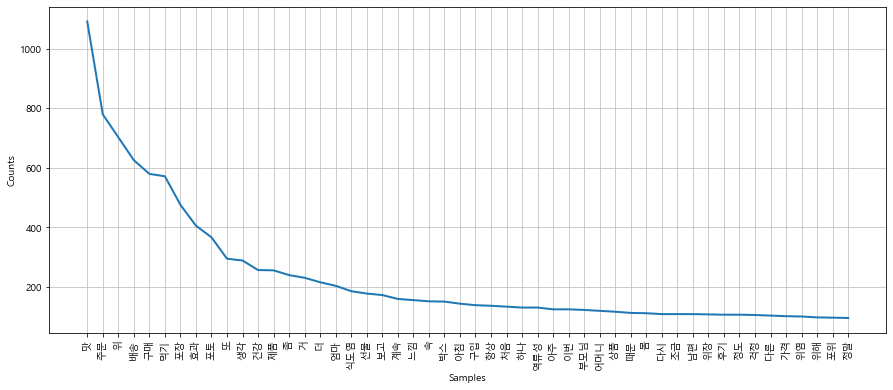

In [53]:
양배추즙리뷰 = nltk.Text(new_tokenss, name='양배추즙리뷰')
plt.figure(figsize=(15,6))
양배추즙리뷰.plot(50)
plt.show()

In [54]:
len(양배추즙리뷰)

26048

In [ ]:
['주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '번',
 '주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
...
 '배달',
 '고민',
 '주문',
 '한지',
 '일만'

In [51]:
stop_words = '''요 저 안 달 걸 번 요 저 안 달 것 때 개 리뷰 펼치기 리뷰펼치기 양배추 브로콜리 룡 농원 즙 제주 포 즙 ''' 
stop_list = stop_words.split()
new_token_list = []
for token in new_tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list
new_tokenss = [token for token in new_tokens if token not in stop_list]

In [61]:
data = 양배추즙리뷰.vocab().most_common(300)
data[:50]

[('맛', 1092),
 ('주문', 780),
 ('위', 703),
 ('배송', 626),
 ('구매', 580),
 ('먹기', 572),
 ('포장', 476),
 ('효과', 406),
 ('포토', 367),
 ('또', 295),
 ('생각', 289),
 ('건강', 257),
 ('제품', 256),
 ('좀', 240),
 ('거', 231),
 ('더', 216),
 ('엄마', 204),
 ('식도염', 186),
 ('선물', 178),
 ('보고', 173),
 ('계속', 160),
 ('느낌', 156),
 ('속', 152),
 ('박스', 151),
 ('아침', 144),
 ('구입', 139),
 ('항상', 137),
 ('처음', 134),
 ('하나', 131),
 ('역류성', 131),
 ('아주', 125),
 ('이번', 125),
 ('부모님', 123),
 ('어머니', 120),
 ('상품', 117),
 ('때문', 113),
 ('몸', 112),
 ('다시', 109),
 ('조금', 109),
 ('남편', 109),
 ('위장', 108),
 ('후기', 107),
 ('정도', 107),
 ('걱정', 106),
 ('다른', 104),
 ('가격', 102),
 ('위염', 101),
 ('위해', 98),
 ('포위', 97),
 ('정말', 96)]

In [37]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.1,
    background_color='white'
).generate_from_frequencies(dict(data))

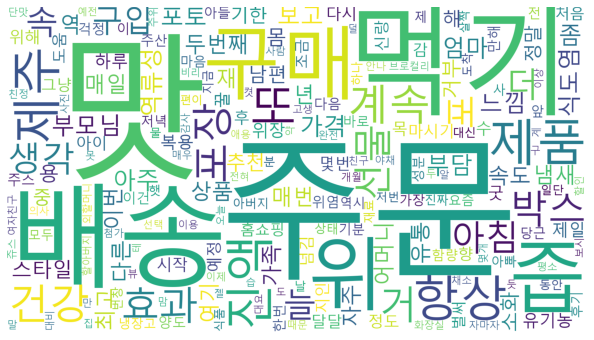

In [37]:
plt.figure(figsize=(12,6))

plt.imshow(wc)
plt.axis('off')
plt.show()

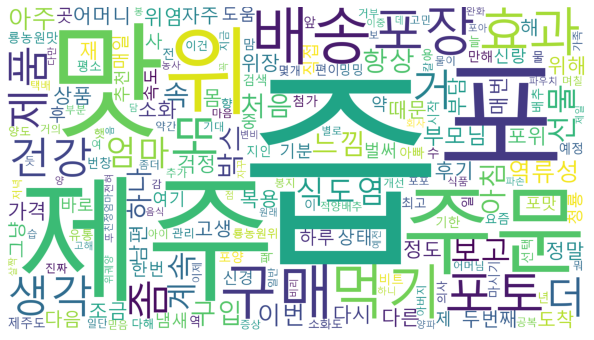

In [56]:
plt.figure(figsize=(12,6))

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
mask = np.array(Image.open('염경환.jpg'))
image_colors = ImageColorGenerator(mask)

In [ ]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='NanumGothicCoding',
    relative_scaling=0.3,
    mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
df['작성년월']

210304    10
210310     9
210507     8
210312     8
210826     8
          ..
200404     1
190706     1
200115     1
210505     1
190925     1
Name: 작성년월일, Length: 892, dtype: int64

In [61]:
df['작성월']= df.작성년월일.apply(lambda x : str(x)[2:4])

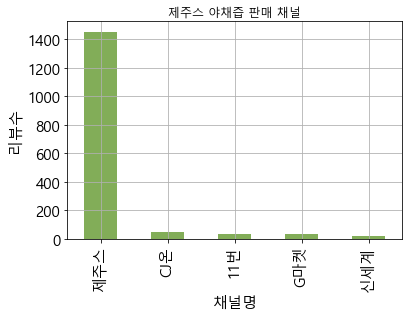

In [126]:
plt.Figure(figsize=(20,12))
df.채널.value_counts()[:5].plot.bar(fontsize=(15),color='#82AD58')
plt.title('제주스 야채즙 판매 채널')
plt.xlabel('채널명',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.grid()
plt.savefig('판매채널.png',dpi=350)

In [68]:

df.groupby([df.작성년,df.작성월]).count()

평점  내용  작성시간  채널  작성년월일  내용정제  작성년월
작성년 작성월                                     
10  04    1   1     1   1      1     1     1
    21    2   2     2   2      2     2     2
    25    1   1     1   1      1     1     1
    73    2   2     2   2      2     2     2
11  02    2   2     2   2      2     2     2
...      ..  ..   ...  ..    ...   ...   ...
95  03    1   1     1   1      1     1     1
    21    1   1     1   1      1     1     1
97  21    1   1     1   1      1     1     1
99  10    1   1     1   1      1     1     1
    32    1   1     1   1      1     1     1

[148 rows x 7 columns]

In [27]:
pwd

'/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아'

In [28]:
mask_양배추 = np.array(Image.open('/home/miwoos/WorkSpace/GoogleDrive/Data/내일프로젝트(홀푸드코리아)/양배추.jpg'))
image_colors_양배추 = ImageColorGenerator(mask_양배추)

In [29]:
image_colors_양배추

In [30]:
wc_양배추 = WordCloud(
    width=1920, height=1080,
    font_path='NanumGothicCoding.ttf',
    relative_scaling=0.3,
    mask=mask_양배추,
    background_color='black',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc_양배추.to_array()

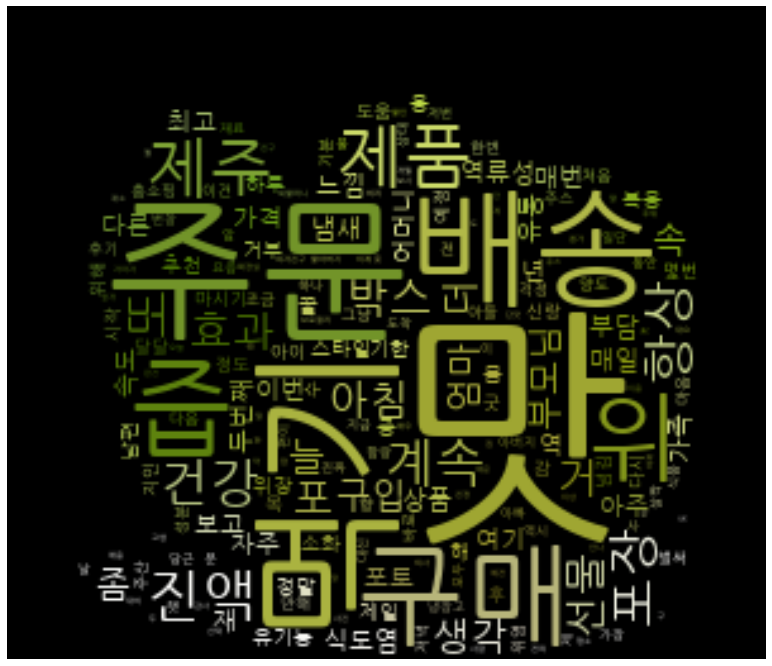

In [31]:
plt.figure(figsize=(20,12))
plt.imshow(wc_양배추.recolor(color_func=image_colors_양배추),interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
df.내용정제.cont

,평점,내용,작성시간,채널,작성년월일,내용정제,작성년월,작성년,작성월
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,2003,20,03
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,2103,21,03
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,2102,21,02
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,2101,21,01
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,2105,21,05
...,...,...,...,...,...,...,...,...,...
1655,5,hrgh****21.07.28.만족합니다 만족합니다.만족합니다 만족합니다.리뷰펼치기,210728,제주스,210728,만족합니다 만족합니다만족합니다 만족합니다리뷰펼치기,2107,21,07
1656,5,dltk****21.09.16.좋습니다.좋습니다..좋습니다.좋습니다..리뷰펼치기,210916,제주스,210916,좋습니다좋습니다좋습니다좋습니다리뷰펼치기,2109,21,09
1657,4,naki****19.09.25.참 좋아요! 11111참 좋아요! 11111리뷰펼치기,1909251111111111,제주스,190925,참 좋아요 참 좋아요 리뷰펼치기,1909,19,09
1658,4,*e*****21.08.03.gooooodgoooood리뷰펼치기,210803,옥션a,210803,리뷰펼치기,2108,21,08


In [106]:
data = 양배추즙리뷰.vocab().most_common(300)
data[:50]

[('맛', 761),
 ('주문', 405),
 ('먹기', 402),
 ('배송', 381),
 ('구매', 367),
 ('즙', 349),
 ('위', 335),
 ('제품', 253),
 ('제주', 242),
 ('진액', 225),
 ('항상', 182),
 ('또', 163),
 ('계속', 160),
 ('건강', 153),
 ('포장', 151),
 ('효과', 137),
 ('거', 137),
 ('선물', 134),
 ('박스', 125),
 ('아침', 109),
 ('포', 107),
 ('생각', 106),
 ('늘', 101),
 ('더', 101),
 ('속', 86),
 ('구입', 86),
 ('부모님', 85),
 ('좀', 85),
 ('엄마', 81),
 ('식도염', 79),
 ('아주', 74),
 ('가격', 74),
 ('포토', 72),
 ('역류성', 68),
 ('보고', 68),
 ('부담', 68),
 ('느낌', 64),
 ('두번째', 64),
 ('다른', 63),
 ('냄새', 62),
 ('매일', 61),
 ('년', 60),
 ('매번', 60),
 ('상품', 58),
 ('역', 56),
 ('어머니', 56),
 ('속도', 56),
 ('재', 54),
 ('이번', 54),
 ('최고', 54)]

In [120]:
df['키워드'] = df.내용정제.apply(lambda x: '맛' if (x.__contains__('맛') or x.__contains__('먹기')) else
                                            '편의성' if (x.__contains__('배송') or x.__contains__('구매')) else
                                            '재료' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '제주' if x.__contains__('제주') else
                                            '기타' 
                                ) 

In [121]:
df['키워드']

0       기타
1        맛
2        맛
3        맛
4        맛
        ..
1655    기타
1656    기타
1657    기타
1658    기타
1659    기타
Name: 키워드, Length: 1660, dtype: object

In [ ]:
df[df.카페명 =='전기차동호회(투플럭스)'][df['키워드'] != '미분류'].groupby([df.키워드,df.평가]).키워드.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('키워드별긍부정.png',dpi=350)

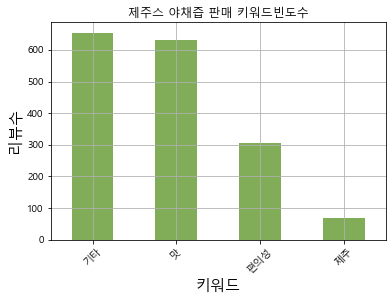

In [130]:
df['키워드'].value_counts().plot.bar(color='#82AD58')
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.savefig('키워드.png',dpi=350)

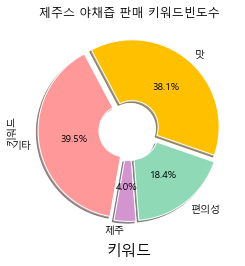

In [142]:
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['키워드'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.savefig('키워드pie.png',dpi=350)

In [42]:
df.columns

Index(['Unnamed: 0', '평점', '내용', '작성시간', '채널', '작성년월일', '내용정제'], dtype='object')

In [44]:
df.내용.str.contains('맛있').value_counts()

False    1531
True      129
Name: 내용, dtype: int64

In [55]:
df.내용.str.contains('불편').value_counts()

False    1638
True       22
Name: 내용, dtype: int64

False    1656
True        4
Name: 내용, dtype: int64

In [46]:
df.내용.str.contains('맛이있').value_counts()

False    1657
True        3
Name: 내용, dtype: int64

In [45]:
df.내용.str.contains('맛없').value_counts()

False    1653
True        7
Name: 내용, dtype: int64

In [47]:
df.내용.str.contains('맛이없').value_counts()

False    1659
True        1
Name: 내용, dtype: int64

In [69]:
df['키워드'] = df.내용정제.apply(lambda x: '맛' if (x.__contains__('맛') or x.__contains__('먹기')) else
                                            '편의성' if (x.__contains__('배송') or x.__contains__('구매')) else
                                            '재료' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '제주' if x.__contains__('제주') else
                                            '건강' if (x.__contains__('건강') or  x.__contains__('위') or x.__contains__('효과') or x.__contains__('식도염'))
                                            else '미분류'
                                ) 

In [57]:
df['맛이있다없다'] = df.내용정제.apply(lambda x: '맛이있다' if (x.__contains__('맛있')) else
                                            '맛이없다' if (x.__contains__('맛없') )
                                            else '미분류'
                                ) 

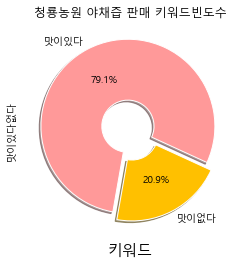

In [60]:

explode = [0.05, 0.05]
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['맛이있다없다'][df['맛이있다없다']!='미분류'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('청룡농원 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.savefig('청룡농원맛이있다없다.png',dpi=350)

In [67]:
cd ~/WorkSpace/GoogleDrive/Data/

/home/miwoos/WorkSpace/GoogleDrive/Data


In [65]:
pwd

'/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아'

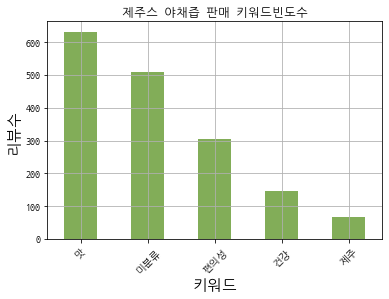

In [70]:
df['키워드'].value_counts().plot.bar(color='#82AD58')
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.savefig('키워드.png',dpi=350)

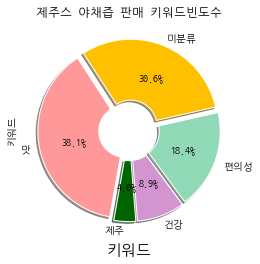

In [71]:
explode = [0.05, 0.05, 0.05, 0.05,0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#006400']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['키워드'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.savefig('키워드pie.png',dpi=350)